In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
import random

In [2]:
#2005-2010的因子收益率
fct_mon=pd.read_csv('fct_mon.csv')
fct_mon.drop(columns='Unnamed: 0',inplace=True)
fct_mon

,month,country,beta,value,growth,momentum,size,leverage,earnings,liquidity,...,demean_materials,demean_industrials,demean_consumer_discretionary,demean_consumer_staples,demean_health_care,demean_financials,demean_information,demean_telecom,demean_utilities,demean_real_estate
0,2005-05,-0.084011,-0.016308,0.000516,-0.010810,-0.058812,-0.014709,0.001442,0.008021,-0.001592,...,0.015428,0.010182,0.028774,0.022749,0.008921,-0.010357,0.054528,-0.001691,-0.022131,-0.014023
1,2005-06,0.008757,-0.011878,-0.005379,-0.001064,0.014213,0.015391,-0.004848,-0.002003,0.005126,...,-0.000375,-0.012164,0.003724,-0.006201,-0.041724,0.022672,0.000597,0.020563,0.043437,0.003193
2,2005-07,-0.011751,-0.002583,0.002416,0.009663,0.011548,0.050924,-0.007994,0.004136,0.017468,...,-0.008601,0.001747,-0.012457,-0.003234,-0.004879,0.052219,-0.008456,0.010316,0.021565,0.042101
3,2005-08,0.055754,0.034267,0.004633,0.009446,-0.027481,-0.017377,0.005495,-0.013354,-0.023230,...,-0.013422,0.001476,-0.010175,0.010583,0.003781,-0.012103,0.030209,0.025908,0.021785,-0.008009
4,2005-09,-0.002458,-0.002978,-0.020718,0.016477,-0.009207,-0.022967,-0.000758,-0.000779,-0.010510,...,0.017883,-0.002858,-0.005175,-0.039811,-0.046327,-0.000043,-0.029121,-0.026417,0.003870,0.026091
5,2005-10,-0.069602,0.005598,-0.000480,0.009002,0.021315,-0.015006,0.010307,-0.004010,-0.000667,...,0.015794,0.002276,-0.002202,-0.002942,0.026053,-0.037390,0.027887,0.043025,-0.010841,-0.035932
6,2005-11,-0.015559,0.013323,0.018339,0.007893,-0.028539,0.025178,-0.004091,-0.008916,0.002646,...,-0.021710,-0.008831,0.006136,-0.016785,-0.046093,0.061942,-0.012864,0.032119,0.006018,0.056394
7,2005-12,0.050869,0.012657,0.003176,-0.000232,0.021204,0.015137,0.000977,0.004832,0.007054,...,0.003953,-0.023501,0.007407,-0.010625,-0.037931,0.000643,0.004206,-0.021258,-0.004049,-0.007409
8,2006-01,0.084028,0.024586,0.000053,0.005404,0.014681,0.003754,0.006883,-0.003139,0.013625,...,0.034898,-0.005271,-0.008962,-0.012137,-0.021904,0.030572,0.038297,0.030222,-0.015575,0.023911
9,2006-02,0.028627,0.015760,0.024591,0.012303,0.003697,-0.006994,0.001766,-0.000203,0.011005,...,-0.004738,-0.019553,0.008328,0.076056,-0.018800,-0.006066,-0.008192,-0.105383,-0.029523,-0.013525


In [3]:
#2005-2010的个股收益率
hs_mon=pd.read_csv('hs_mon.csv')
hs_mon.drop(columns='Unnamed: 0',inplace=True)
hs_mon

,month,return,cum,symbol
0,2005-05,-0.177958,0.822042,000937.SZ
1,2005-06,-0.205305,0.653273,000937.SZ
2,2005-07,0.073813,0.701493,000937.SZ
3,2005-08,-0.085104,0.641793,000937.SZ
4,2005-09,0.014306,0.650974,000937.SZ
...,...,...,...,...
6475,2009-12,0.004535,5.127519,000001.SZ
6476,2010-01,-0.109561,4.565742,000001.SZ
6477,2010-02,0.034563,4.723546,000001.SZ
6478,2010-03,0.033407,4.881345,000001.SZ


In [5]:
X.shape

(108, 60)

In [4]:
X=[]
for symbol in hs_mon.symbol.unique():
    X.append(hs_mon.loc[hs_mon.symbol==symbol]['return'].values)
X=np.array(X)
X

array([[-1.77957546e-01, -2.05305073e-01,  7.38127175e-02, ...,
         4.79049538e-02,  6.54281654e-02, -8.47410598e-02],
       [ 9.35248579e-02, -2.02002013e-02, -1.09966669e-01, ...,
         2.80880801e-02,  6.83079947e-02, -1.25320405e-01],
       [ 7.47111962e-02,  1.02440104e-01, -9.80387831e-02, ...,
         4.54817681e-02, -1.26288897e-02,  3.33964630e-01],
       ...,
       [-1.45302892e-01, -3.20855812e-02,  5.24859035e-02, ...,
         6.90415114e-02,  1.16862542e-01,  7.34163843e-03],
       [-2.11868213e-01,  4.37854467e-02,  2.22931080e-01, ...,
         9.63566461e-03,  7.42089190e-03, -1.78945030e-01],
       [-3.06416544e-02, -1.33129321e-02,  2.22044605e-16, ...,
         3.45627054e-02,  3.34068439e-02, -1.13792774e-01]])

In [8]:
y.shape

(12, 60)

In [6]:
y=fct_mon[fct_mon.columns[1:13]].values.T

In [9]:
y_demean=fct_mon[fct_mon.columns[49:61]].values.T

In [252]:
#y第二轮
y=fct_mon[['beta', 'value', 'growth', 'momentum', 'size', 'leverage',
       'earnings', 'liquidity', 'nlsize', 'residualvolatility', 'dividend','country' ]].values.T
y_alpha=colinear(y,1)

In [10]:
fct_mon.columns[2:13]

Index(['beta', 'value', 'growth', 'momentum', 'size', 'leverage', 'earnings',
       'liquidity', 'nlsize', 'residualvolatility', 'dividend'],
      dtype='object')

In [11]:
def sortt(a,n):
    a.sort()
    for i in range(len(a)):
        if n<=a[i]:
            return (i+1)/len(a)

#考虑了scaled
def run_ntimes_bstrap_std(X,y_demean,n,block_size):
    MIN=[]
    for i in range(n):
        rlt=ols_std(X,y_demean,'whatever',block_size)
        MIN.append(rlt.median_inc.min())
        if i%100==0:
            print(i)
    return MIN



def bootstrap(X,y,block_size):
    col_X=X.shape[0]#X的列数,即个股的样本数目,这里是108
    row_X=X.shape[1]#X的行数,即T的期数,这里是60
    xy=np.append(X, y,axis = 0)
#                                           xy:     array([[ 1,  2,  3],
#                                                    [ 1,  2,  3],
#                                                    [ 1,  2,  3],
#                                                    [-1, -2, -3],
#                                                    [-1, -2, -3]])
    at=xy.T
#                                           at:     array([[ 1,  1,  1, -1, -1],
#                                                [ 2,  2,  2, -2, -2],
#                                                [ 3,  3,  3, -3, -3]])
    sqe=list(range(block_size))
    sqe[0]=np.random.randint(0,row_X,row_X//block_size)
#     print(sqe[0])
    for i in range(1,len(sqe)):
        sqe[i]=(sqe[0]+i)%row_X
    sqe=np.array(sqe)
    bot=at[sqe.T.reshape(row_X)]
#                                            bot:    array([[ 3,  3,  3, -3, -3],
#                                                    [ 3,  3,  3, -3, -3],
#                                                 [ 1,  1,  1, -1, -1]])
    return bot.T[:col_X],bot.T[col_X:]


#考虑了scaled
def ols_std(X,y,used_fcts,block_size=0):#X:(N*T),y:(f*T)
    inc=[]
    median=[]
    inc_base=[]
    bse=[]
    
    if block_size!=0:
        tup=bootstrap(X,y,block_size)
        X=tup[0]
        y=tup[1]
       
    fy=sm.add_constant(np.zeros(X.shape[1])) #注意，这里当no_factor作为base_line时不需要做boostrap
    for i in range(len(X)):
        model = sm.OLS(X[i],fy).fit()
        inc_base.append(abs(model.params[0]))
        bse.append(model.bse[0])
    inc_base=np.array(inc_base)
    bse=np.array(bse)
            
    for fy in y:#前提是y为转至的，也就是这些个fy长度都是T期的
        fy = sm.add_constant(fy)
        for i in range(len(X)):
            model = sm.OLS(X[i],fy).fit()
            inc.append(abs(model.params[0]))
        inc=np.array(inc)
        median.append(np.percentile(inc/bse, (50,))[0])
        inc=[]
        
    base_line=np.percentile(inc_base/bse, (50,))[0]
    med=(np.array(median)-base_line)/base_line
    return pd.DataFrame({'used_fcts':used_fcts,'median_inc':med})  


####----------------------------------------------------------------

#对base_line因子共线预处理
def colinear(y,j):
    inc=[]
    f_bl=sm.add_constant(y[-j:].T)#这是base_line_model
    
    for f_alpha in y[:-j]:
        model = sm.OLS(f_alpha,f_bl).fit()
        inc.append(model.params[0])
    for jj in range(j):
        inc.append(0)

    return y-np.array([np.ones(y.shape[1])*x for x in inc])


def run_ntimes_bstrap_niter(X,y_demean,j,n,block_size):
    MIN=[]
    for i in range(n):
        rlt=ols_niter(X,y_demean,'whatever',j,block_size)
        MIN.append(rlt.median_inc.min())
        if i%100==0:
            print(i)
    return MIN
    

#base_line_model
#过程中需要给出（f-j）个fy，每个fy为j+1因子模型，最后是"一个"j因子的base_line。以上都是T期
def ols_niter(X,y,used_fcts,j,block_size=0):#X:(N*T),y:(f*T)  且y的最后j行是base_line
    inc=[]
    median=[]
    inc_base=[]
    bse=[]

    
    if block_size!=0:
        tup=bootstrap(X,y,block_size)#注意到当base_line不是no_factor时，需要一起做bootstrap,因此y里包含base_line放最后j行
        X=tup[0]
        y=tup[1]
        
    fy=sm.add_constant(y[-j:].T)#这是base_line_model
        
    for i in range(len(X)):
        model = sm.OLS(X[i],fy).fit()
        inc_base.append(abs(model.params[0]))
        bse.append(model.bse[0])
    inc_base=np.array(inc_base)
    bse=np.array(bse)

    y=argue_model(y,j)#这是arguement_model
    
    for fy in y:
        fy = sm.add_constant(fy)
        for i in range(len(X)):
            model = sm.OLS(X[i],fy).fit()
            inc.append(abs(model.params[0]))
        inc=np.array(inc)
        median.append(np.percentile(inc/bse, (50,))[0])
        inc=[]
      
    base_line=np.percentile(inc_base/bse, (50,))[0]
    med=(np.array(median)-base_line)/base_line

    
    return pd.DataFrame({'used_fcts':used_fcts,'median_inc':med}) 


def argue_model(y,j):
    rlt=[]
    for i in range(len(y)-j):
        tmp=np.append(y[-j:], y[i:i+1],axis = 0)
        rlt.append(tmp.T)
    return np.array(rlt)

In [30]:
rlt0=ols_std(X,y,fct_mon.columns[1:13].values)
rlt0

,used_fcts,median_inc
0,country,-0.637064
1,beta,-0.291887
2,value,-0.118446
3,growth,-0.340497
4,momentum,0.009188
5,size,-0.166617
6,leverage,-0.067946
7,earnings,-0.004830
8,liquidity,0.124884
9,nlsize,-0.040444


In [208]:
rlt1=ols_niter(X,y,fct_mon.columns[2:13].values,1)
rlt1

,used_fcts,median_inc
0,beta,-0.006246
1,value,0.062673
2,growth,0.087295
3,momentum,-0.092177
4,size,-0.189932
5,leverage,-0.116776
6,earnings,-0.002594
7,liquidity,0.053670
8,nlsize,-0.031351
9,residualvolatility,-0.035801


0
100
200
300
400
500
600
700
demean_country [-0.45356749]


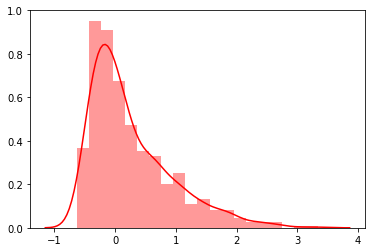

0
100
200
300
400
500
600
700
demean_beta [-0.28820314]


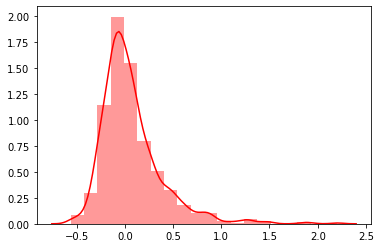

0
100
200
300
400
500
600
700
demean_value [-0.15523327]


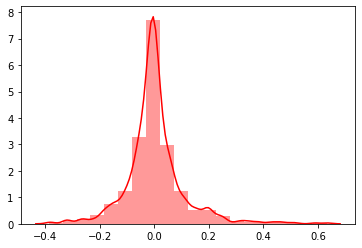

0
100
200
300
400
500
600
700
demean_growth [-0.13533925]


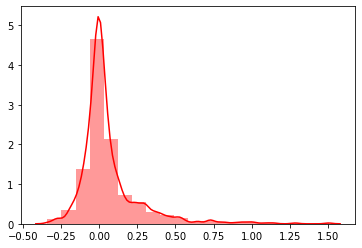

In [246]:
for i in range(49,53):
    y_demean=fct_mon[fct_mon.columns[i:i+1]].values.T
    rlt0_demean=run_ntimes_bstrap_std(X,y_demean,800,2)
    print(fct_mon.columns[i:i+1].values[0],np.percentile(rlt0_demean,(5,)))
    f = sns.distplot(rlt0_demean, color='red', bins=20,hist=True)
    plt.show()

In [13]:
fct_mon.columns[49]

'demean_country'

0
100
200
300
400
500
600
700
demean_country -0.6370639417148204 [-0.471168] p_value: 0.0025


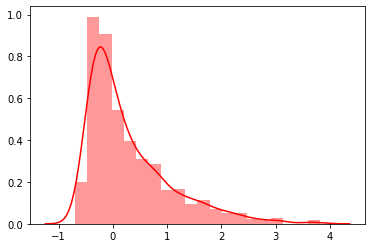

0
100
200
300
400
500
600
700
demean_beta -0.29188706396982395 [-0.30324507] p_value: 0.05875


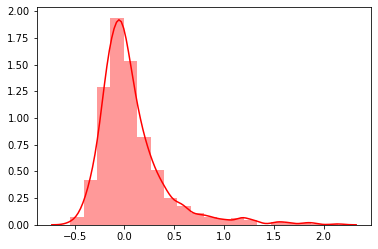

0
100
200
300
400
500
600
700
demean_value -0.11844599148620041 [-0.12909952] p_value: 0.05875


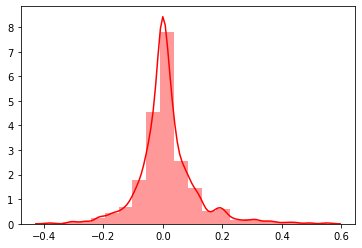

0
100
200
300
400
500
600
700
demean_growth -0.34049668362308916 [-0.14050721] p_value: 0.00375


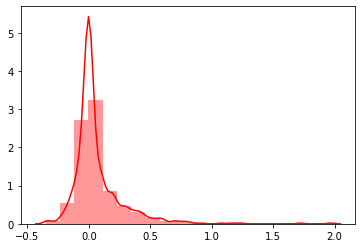

0
100
200
300
400
500
600
700
demean_momentum 0.00918832203910912 [-0.13284668] p_value: 0.69875


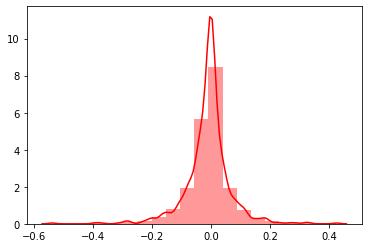

0
100
200
300
400
500
600
700
demean_size -0.16661741809913527 [-0.1900589] p_value: 0.0675


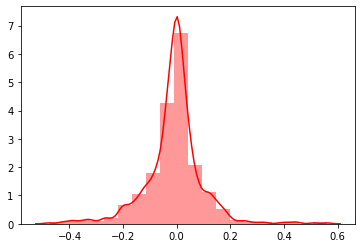

0
100
200
300
400
500
600
700
demean_leverage -0.06794618413679113 [-0.10423763] p_value: 0.0875


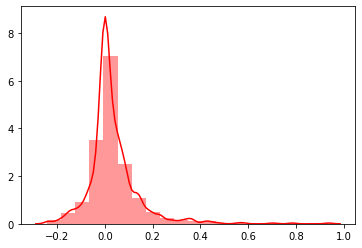

0
100
200
300
400
500
600
700
demean_earnings -0.004830434116302554 [-0.08726251] p_value: 0.40625


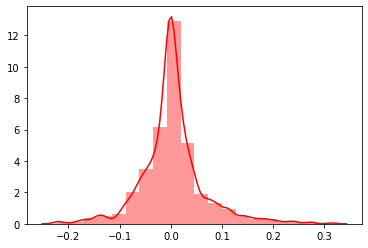

0
100
200
300
400
500
600
700
demean_liquidity 0.12488385010089005 [-0.26209008] p_value: 0.855


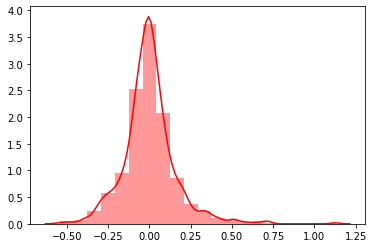

0
100
200
300
400
500
600
700
demean_nlsize -0.04044433769446085 [-0.15487045] p_value: 0.28625


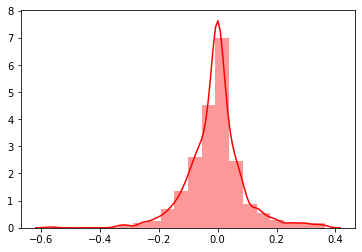

0
100
200
300
400
500
600
700
demean_residualvolatility -0.00535724137113868 [-0.06894627] p_value: 0.32125


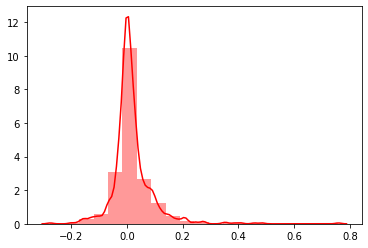

0
100
200
300
400
500
600
700
demean_dividend 0.00907787980433102 [-0.08606772] p_value: 0.67125


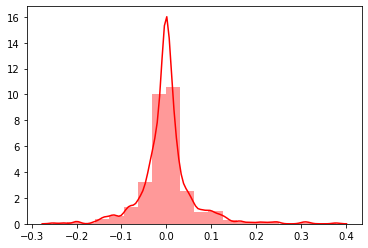

In [250]:
SI=[]
SI_5=[]
p_value=[]
for i in range(49,61):
    y_demean=fct_mon[fct_mon.columns[i:i+1]].values.T
    rlt0_demean=run_ntimes_bstrap_std(X,y_demean,800,4)
    print(fct_mon.columns[i:i+1].values[0],rlt0.median_inc.values[i-49],np.percentile(rlt0_demean,(5,)),\
          'p_value:',sortt(rlt0_demean,rlt0.median_inc.values[i-49]))
    f = sns.distplot(rlt0_demean, color='red', bins=20,hist=True)
    plt.show()
    SI.append(rlt0.median_inc.values[i-49])
    SI_5.append(np.percentile(rlt0_demean,(5,))[0])
    p_value.append(sortt(rlt0_demean,rlt0.median_inc.values[i-49]))

In [254]:
pd.DataFrame({'factor':rlt0.used_fcts.values,'SI':SI,'5th_percentile':SI_5,'p_value':p_value})

,factor,SI,5th_percentile,p_value
0,country,-0.637064,-0.471168,0.00250
1,beta,-0.291887,-0.303245,0.05875
2,value,-0.118446,-0.129100,0.05875
3,growth,-0.340497,-0.140507,0.00375
4,momentum,0.009188,-0.132847,0.69875
5,size,-0.166617,-0.190059,0.06750
6,leverage,-0.067946,-0.104238,0.08750
7,earnings,-0.004830,-0.087263,0.40625
8,liquidity,0.124884,-0.262090,0.85500
9,nlsize,-0.040444,-0.154870,0.28625


0
100
200
300
400
500
600
700
[-0.47525177]


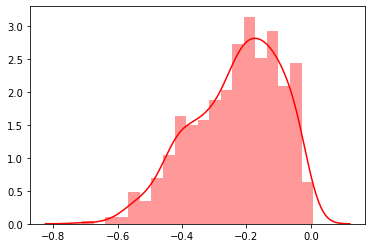

In [237]:
rlt0_ali=run_ntimes_bstrap_std(X,y_demean,800,4)
print(np.percentile(rlt0_ali,(5,)),'p_value:',sortt(rlt0_ali,rlt0.median_inc.min()))
f = sns.distplot(rlt0_ali, color='red', bins=20,hist=True)

0
100
200
300
400
500
600
700
beta -0.006246260356923104 [-0.06283252] p_value: 0.3225


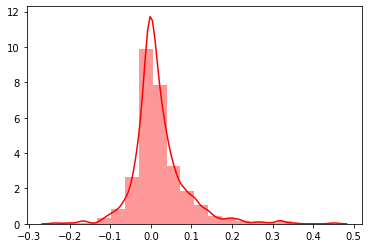

0
100
200
300
400
500
600
700
value 0.06267281374945362 [-0.09442296] p_value: 0.8925


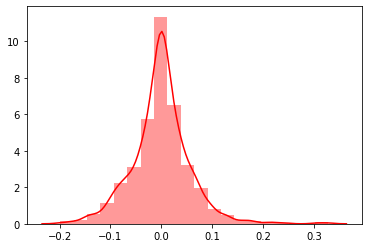

0
100
200
300
400
500
600
700
growth 0.08729513150799235 [-0.13923803] p_value: 0.94625


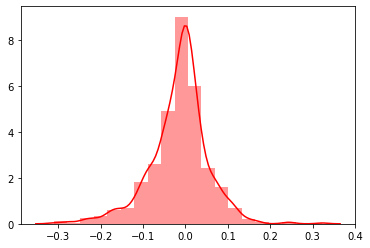

0
100
200
300
400
500
600
700
momentum -0.09217667788474489 [-0.10405762] p_value: 0.0725


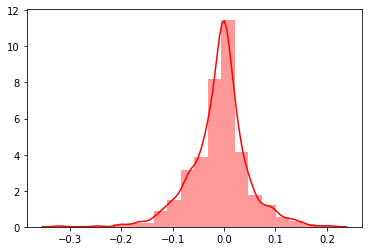

0
100
200
300
400
500
600
700
size -0.18993225923564944 [-0.14819282] p_value: 0.0275


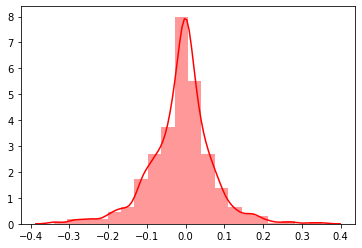

0
100
200
300
400
500
600
700
leverage -0.11677616744476366 [-0.10859035] p_value: 0.0425


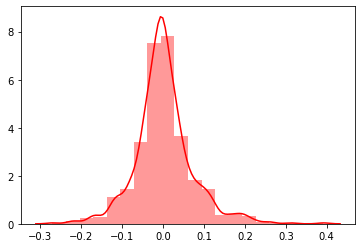

0
100
200
300
400
500
600
700
earnings -0.0025937522120666498 [-0.08680794] p_value: 0.485


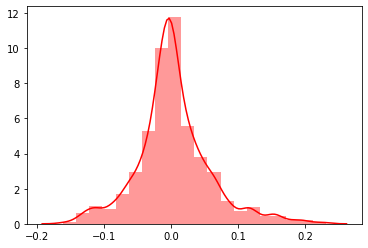

0
100
200
300
400
500
600
700
liquidity 0.05367007981811051 [-0.11713354] p_value: 0.88375


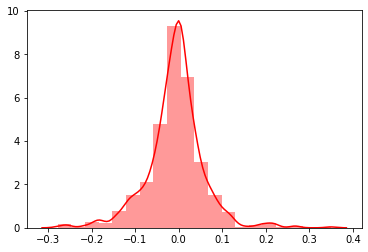

0
100
200
300
400
500
600
700
nlsize -0.03135067200117523 [-0.09409421] p_value: 0.24875


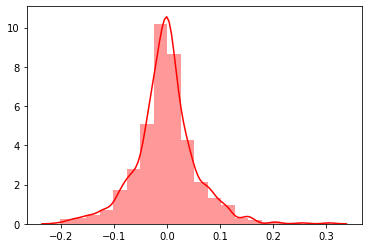

0
100
200
300
400
500
600
700
residualvolatility -0.03580117203032708 [-0.1047015] p_value: 0.25


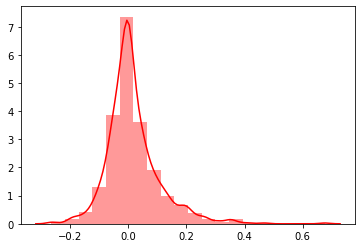

0
100
200
300
400
500
600
700
dividend 0.01169221187154801 [-0.09778676] p_value: 0.70375


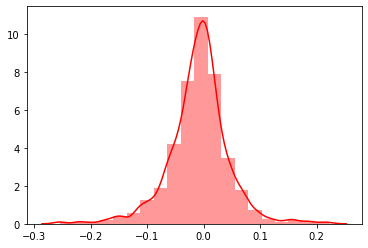

In [253]:
SI_1=[]
SI_5_1=[]
p_value_1=[]
for i in range(len(y_alpha)-1):
    rlt1_sgl=run_ntimes_bstrap_niter(X,y_alpha[[i,-1]],1,800,4)
    print(fct_mon.columns[i+2:i+3].values[0],rlt1.median_inc.values[i],np.percentile(rlt1_sgl,(5,)),\
         'p_value:',sortt(rlt1_sgl,rlt1.median_inc.values[i]))
    f = sns.distplot(rlt1_sgl, color='red', bins=20,hist=True)
    plt.show()
    SI_1.append(rlt1.median_inc.values[i])
    SI_5_1.append(np.percentile(rlt1_sgl,(5,))[0])
    p_value_1.append(sortt(rlt1_sgl,rlt1.median_inc.values[i]))

In [255]:
pd.DataFrame({'factor':rlt1.used_fcts.values,'SI':SI_1,'5th_percentile':SI_5_1,'p_value':p_value_1})

,factor,SI,5th_percentile,p_value
0,beta,-0.006246,-0.062833,0.32250
1,value,0.062673,-0.094423,0.89250
2,growth,0.087295,-0.139238,0.94625
3,momentum,-0.092177,-0.104058,0.07250
4,size,-0.189932,-0.148193,0.02750
5,leverage,-0.116776,-0.108590,0.04250
6,earnings,-0.002594,-0.086808,0.48500
7,liquidity,0.053670,-0.117134,0.88375
8,nlsize,-0.031351,-0.094094,0.24875
9,residualvolatility,-0.035801,-0.104702,0.25000


0
100
200
300
400
500
600
700
[-0.19557769]


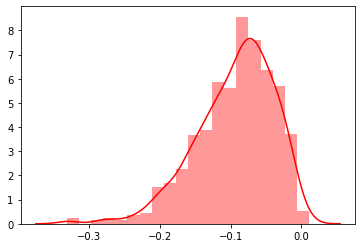

In [231]:
rlt1_alpha=run_ntimes_bstrap_niter(X,y_alpha,1,800,4)
print(np.percentile(rlt1_alpha,(5,)),'p_value:',sortt(rlt1_alpha,rlt1.median_inc.min())
f = sns.distplot(rlt1_alpha, color='red', bins=20,hist=True)

In [ ]:
f = sns.distplot

---------------------------------------

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
demean_country [-0.47637582]


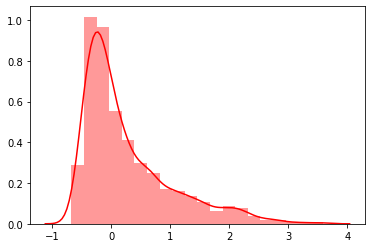

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
demean_country [-0.48428782]


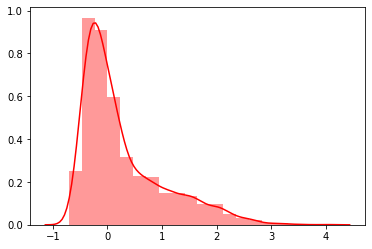

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
demean_country [-0.48325947]


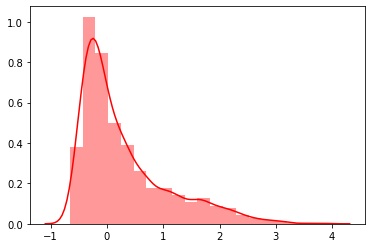

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
demean_country [-0.4755088]


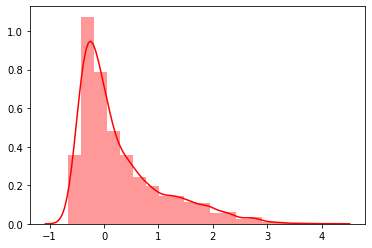

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
demean_country [-0.47661997]


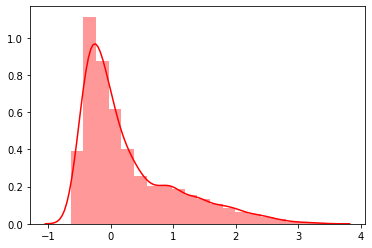

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
demean_country [-0.48986489]


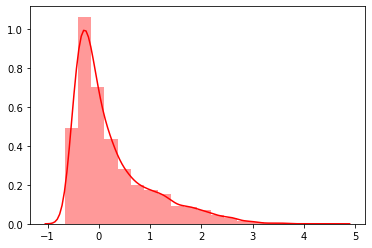

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
demean_country [-0.48692173]


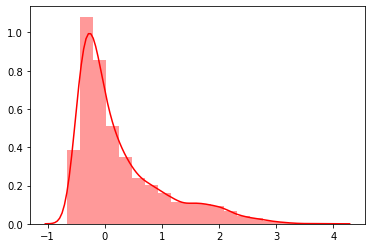

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
demean_country [-0.48029115]


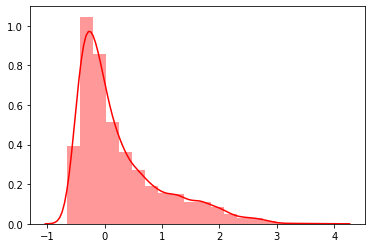

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
demean_country [-0.47765851]


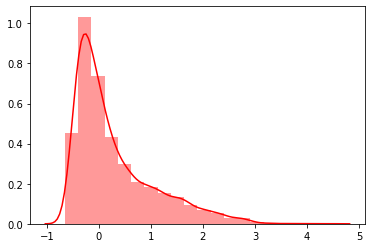

0


KeyboardInterrupt: 

In [35]:
# for j in range(10):
for i in range(49,50):
    y_demean=fct_mon[fct_mon.columns[i:i+1]].values.T
    rlt0_demean=run_ntimes_bstrap_std(X,y_demean,400,4)
    print(fct_mon.columns[i:i+1].values[0],np.percentile(rlt0_demean,(5,)))
    f = sns.distplot(rlt0_demean, color='red', bins=20,hist=True)
    plt.show()